In [186]:
using LinearAlgebra
using Random
using FFTW
using Plots
using LaTeXStrings

Random.seed!(72)

TaskLocalRNG()

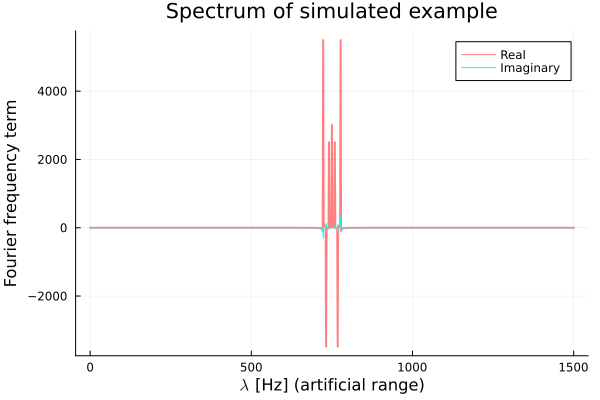

In [187]:
percent  = 0.008
n        = 1000
n₂       = round(Int, n/2)
m        = round(Int, n*percent)

f(x:: Number) =5*cos(2*π*x)-7*cos(4*π*x)+11*cos(6*π*x)+3

# Set spectrum fractions
hz_range = range(0, 1500, n+1) 
# n depends on the resolution of the wave spectrum

# -3 to 3 chosen for better plots because normal distribution rarely exceeds
t_smooth              = range(-3, 3, n)
interferogram_smooth  = f.(t_smooth)

# Spectrum from linear system
smooth_spectrum = rfft(interferogram_smooth)
smooth_spectrum = vcat(reverse(conj.(smooth_spectrum[2:end])), smooth_spectrum)

plot(hz_range, real.(smooth_spectrum), color=:red, lw =2, alpha = .5 , label="Real")
plot!(hz_range, imag.(smooth_spectrum), color=:cyan, label="Imaginary")
plot!(title="Spectrum of simulated example", xlabel=L"\lambda"*" [Hz] (artificial range)", ylabel="Fourier frequency term")

0.999

[2, 1002]
CartesianIndex{2}[CartesianIndex(1001, 1), CartesianIndex(1, 1001)]

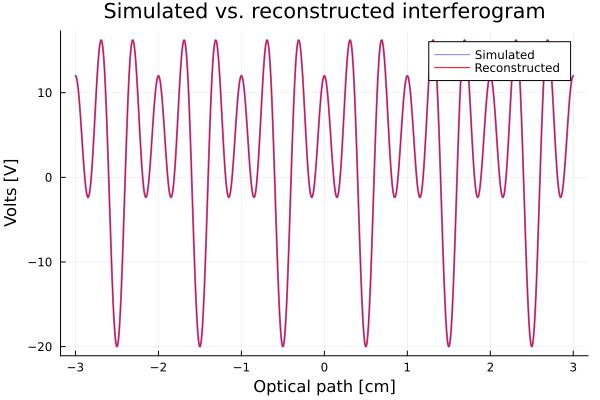

In [200]:
DFT_smooth = [exp(-2*π*im*m*k/n) for m=0:n-1, k=-n₂:n₂]
iDFT_smooth = [exp(2*π*im*m*k/n)/n for m=0:n-1, k=-n₂:n₂]

display(norm(iDFT_smooth'iDFT_smooth-I(n+1), Inf))
aux=findall(x -> abs(x)>0.0005, iDFT_smooth'iDFT_smooth)
println(findall(x -> x[1]!=x[2], aux))
print(aux[[2, 1002]])

# Get interferogram to check
interferogram_from_smooth = iDFT_smooth*smooth_spectrum

plot(t_smooth, interferogram_smooth, color=:blue, lw =2, alpha = .5, label="Simulated")
plot!(t_smooth, real(interferogram_from_smooth), color=:red, label="Reconstructed")
plot!(title="Simulated vs. reconstructed interferogram", xlabel="Optical path [cm]", ylabel="Volts [V]")

4×4 Matrix{Float64}:
 1000.0     999.998   999.993   999.985
  999.998  1000.0     999.998   999.993
  999.993   999.998  1000.0     999.998
  999.985   999.993   999.998  1000.0

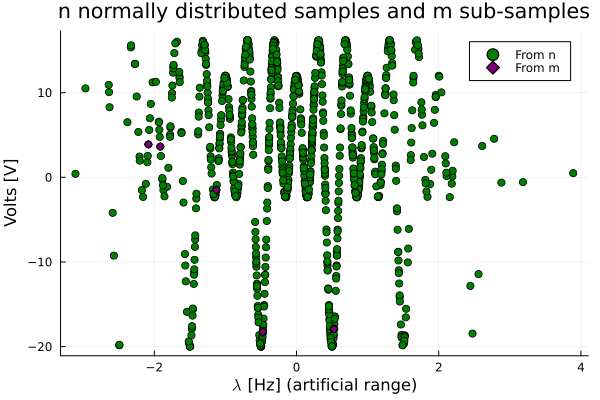

In [202]:
function DFTx(x:: Vector{Number}; n=n, n₂=n₂)
    ω₁=[exp(-2*π*im*x[m]) for m=1:n]

    return reduce(hcat, [ω₁.^(k/n) for k=-n₂:n₂])
end

function iDFTx(x:: Vector{Number}; n=n, n₂=n₂)
    ω₁=[exp(2*π*im*x[m])/n for m=1:n]

    return reduce(hcat, [ω₁.^(k/n) for k=-n₂:n₂])
end

# n random samples normally distributed
tₙ             = Random.randn(n)
interferogramₙ = f.(tₙ) 
DFTₙ           = DFTx(tₙ)
iDFTₙ          = iDFTx(tₙ)

display(real(DFTₙ'DFTₙ)[begin:4, begin:4])

# Choose m random samples from the previous n
rows_id                = randsubseq(1:n, percent)
tₘ                    = tₙ[rows_id]
interferogramₘ        = interferogramₙ[rows_id]
DFTₘ                  = DFTₙ[rows_id, :]
iDFTₘ                 = iDFTₙ[rows_id, :]

scatter(tₙ, interferogramₙ, color=:green, label="From n")
scatter!(tₘ, interferogramₘ, color=:purple, markershape=:diamond, label="From m")
plot!(title="n normally distributed samples and m sub-samples", xlabel=L"\lambda"*" [Hz] (artificial range)", ylabel="Volts [V]")

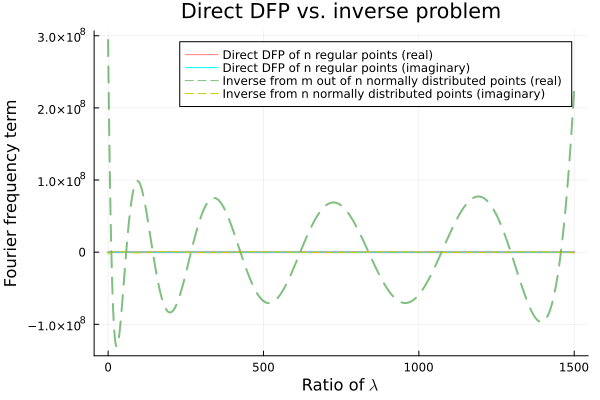

In [190]:
spectrumₙ = iDFTₙ\interferogramₙ

plot(hz_range, real.(smooth_spectrum), color=:red, lw =2, alpha = .5 , label="Direct DFP of n regular points (real)")
plot!(hz_range, imag.(smooth_spectrum), color=:cyan, label="Direct DFP of n regular points (imaginary)")
plot!(hz_range, real.(spectrumₙ), color=:green, lw =2, alpha = .5, linestyle=:dash, label="Inverse from m out of n normally distributed points (real)")
plot!(hz_range, imag.(spectrumₙ), color=:yellow3, linestyle=:dash, label="Inverse from n normally distributed points (imaginary)")
plot!(title="Direct DFP vs. inverse problem", xlabel="Ratio of "*L"\lambda", ylabel="Fourier frequency term")

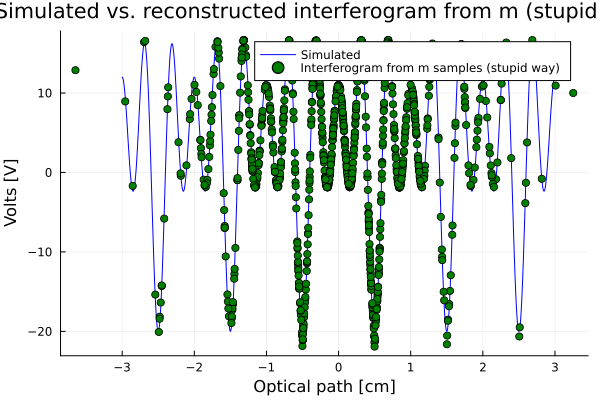

In [191]:
# Get interferogram to check
interferogramₙ = iDFTₙ*spectrumₙ

plot(t_smooth, interferogram_smooth, color=:blue, label="Simulated")
scatter!(tₙ, real(interferogramₙ), color=:green, label="Interferogram from m samples (stupid way)")
plot!(title="Simulated vs. reconstructed interferogram from m (stupid way)", xlabel="Optical path [cm]", ylabel="Volts [V]")

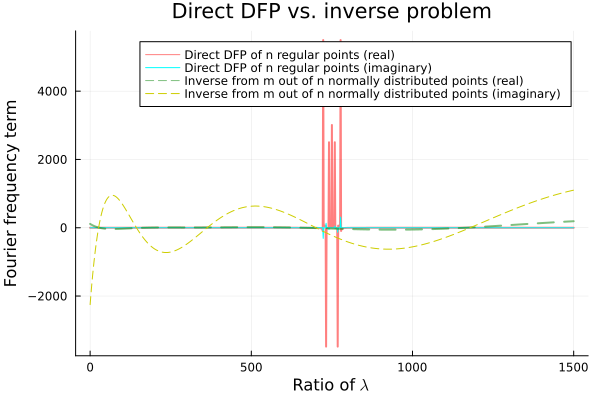

In [192]:
spectrumₘ = iDFTₘ\interferogramₘ

plot(hz_range, real.(smooth_spectrum), color=:red, lw =2, alpha = .5 , label="Direct DFP of n regular points (real)")
plot!(hz_range, imag.(smooth_spectrum), color=:cyan, label="Direct DFP of n regular points (imaginary)")
plot!(hz_range, real.(spectrumₘ), color=:green, lw =2, alpha = .5, linestyle=:dash, label="Inverse from m out of n normally distributed points (real)")
plot!(hz_range, imag.(spectrumₘ), color=:yellow3, linestyle=:dash, label="Inverse from m out of n normally distributed points (imaginary)")
plot!(title="Direct DFP vs. inverse problem", xlabel="Ratio of "*L"\lambda", ylabel="Fourier frequency term")

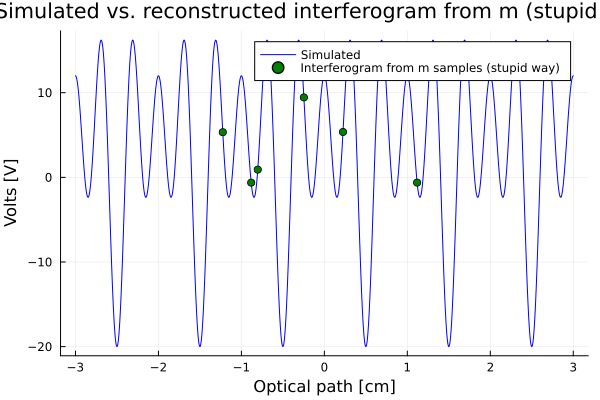

In [193]:
# Get interferogram to check
interferogramₘ = iDFTₘ*spectrumₘ

plot(t_smooth, interferogram_smooth, color=:blue, label="Simulated")
scatter!(tₘ, real(interferogramₘ), color=:green, label="Interferogram from m samples (stupid way)")
plot!(title="Simulated vs. reconstructed interferogram from m (stupid way)", xlabel="Optical path [cm]", ylabel="Volts [V]")

In [ ]:
spectogram_data    = # Spectogram here
interferogram_data = ifft(data.+im.*imag_data)